In [1]:
import gmaps
import gmaps.datasets
import pandas as pd #'1.0.4'
import seaborn as sn

In [2]:
KEY = "......"
gmaps.configure(api_key = KEY) # Fill in with your API key

In [3]:
d = pd.read_csv("../Data/SkeletonCount.csv")
coor = pd.read_csv("../Data/coor.csv")

In [4]:
temp = d.groupby("placeID").sum().reset_index()[["placeID", "Count"]]

In [5]:
temp = pd.merge(temp, coor, on = "placeID")
temp

,placeID,Count,Long,Lat
0,1,331,-0.150357,51.555687
1,2,27,-0.165098,51.556899
2,3,719,-0.159498,51.556765
3,4,19,-0.157035,51.556936
4,5,1670,-0.154072,51.557078
...,...,...,...,...
128,144,15,-0.184382,51.574011
129,145,12,-0.186500,51.575328
130,147,4,-0.188618,51.576644
131,149,1434,-0.184479,51.576778


In [6]:
#density of full skeleton data
locations = temp[["Lat", "Long"]]
weights = temp["Count"]
figure_layout = {'width': '500px', 'margin': '0 auto 0 auto'}
fig = gmaps.figure(layout=figure_layout,map_type='SATELLITE', display_toolbar = False)
#fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
heatmap_layer = gmaps.heatmap_layer(locations, weights=weights)
heatmap_layer.max_intensity = 150
heatmap_layer.point_radius = 6
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px', margin='0 auto 0 auto', width='500px'))

In [7]:
temp2 = d.groupby(["placeID", "h"]).sum().reset_index()[["placeID", "Count", "h"]]
max(temp2.Count)

6043

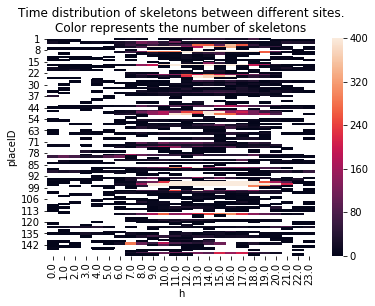

In [8]:
flights = temp2.pivot("placeID", "h", "Count")

ax = sn.heatmap(flights, vmin=0, vmax=400)
ax.set_title('Time distribution of skeletons between different sites.\nColor represents the number of skeletons')
figure = ax.get_figure()    
figure.savefig('../Results/heatmap_h_id.png', dpi=400)

In [9]:
df = pd.read_csv("../Data/Seq_first_ske.csv")

In [10]:
temp3 = df.groupby(["placeID", "h"]).sum().reset_index()[["placeID", "Count", "h"]]
max(temp3.Count)

593

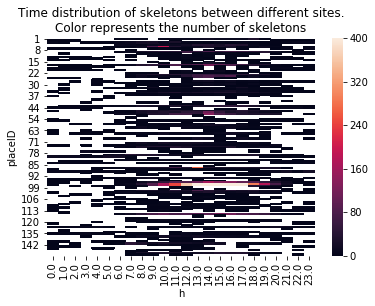

In [11]:
h_seq = temp3.pivot("placeID", "h", "Count")

ax = sn.heatmap(h_seq, vmin=0, vmax=400)
ax.set_title('Time distribution of skeletons between different sites.\nColor represents the number of skeletons')
figure = ax.get_figure()    
figure.savefig('../Results/heatmap_h_id_seq.png', dpi=400)

In [12]:
#density map of human images detected by the openpose

In [13]:
d = pd.read_csv("../Results/results_d.csv")
coor = pd.read_csv("../Data/coor.csv")

In [14]:
op_d = d.loc[d["OpenPose"] == 1, ["placeID", "OpenPose"]]

In [15]:
temp = op_d.groupby("placeID").sum().reset_index()[["placeID", "OpenPose"]]

In [16]:
temp = pd.merge(temp, coor, on = "placeID")
temp

,placeID,OpenPose,Long,Lat
0,1,479,-0.150357,51.555687
1,2,156,-0.165098,51.556899
2,3,1149,-0.159498,51.556765
3,4,94,-0.157035,51.556936
4,5,2806,-0.154072,51.557078
...,...,...,...,...
131,145,75,-0.186500,51.575328
132,146,11,-0.184654,51.575761
133,147,18,-0.188618,51.576644
134,149,3261,-0.184479,51.576778


In [17]:
#density of openpose human image data
locations = temp[["Lat", "Long"]]
weights = temp["OpenPose"]
figure_layout = {'width': '500px', 'margin': '0 auto 0 auto'}
fig = gmaps.figure(layout=figure_layout,map_type='SATELLITE', display_toolbar = False)
#fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
heatmap_layer = gmaps.heatmap_layer(locations, weights=weights)
heatmap_layer.max_intensity = 150
heatmap_layer.point_radius = 6
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px', margin='0 auto 0 auto', width='500px'))

In [61]:
#presence_map = gmaps.symbolabs_layer(
#   temp[["Lat","Long"]], fill_color='red', stroke_color='blue',fill_opacity = 0.5, stroke_opacity=0,
#     scale=[int(x / 1000) + 5 for x in list(temp["OpenPose"])], info_box_content=[str(x) for x in list(temp["placeID"])])

#fig = gmaps.figure()
#fig.add_layer(presence_map)
#fig

In [38]:
xiangD = pd.read_csv("~/Downloads/landscape.csv")

In [47]:
xiangD

,Place ID,Latitude,Longitude
0,Ayos,3.906557,12.525616
1,Bokito,4.572275,11.118336
2,Dja,3.150000,13.000000
3,Ebolowa,2.921054,11.153526
4,Elat,2.680026,10.837815
5,Konye,4.922287,9.464687
6,Ngoumou,3.589449,11.306906
7,Somalomo,3.381138,12.734300


In [49]:


starbucks_layer = gmaps.symbol_layer(
    xiangD[['Latitude', 'Longitude']], fill_color='red', stroke_color='red', scale=4, info_box_content = list(xiangD["Place ID"]))
fig = gmaps.figure()
fig.add_layer(starbucks_layer)
fig

Figure(layout=FigureLayout(height='420px'))